In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

#seaborn theme
import seaborn as sns
sns.set()
sns.set(font='Gill Sans MT')

### https://data.calgary.ca/Business-and-Economic-Activity/Building-Permits/c2es-76ed for building permits

In [5]:
b_perm = pd.read_csv('data//Building_Permits.csv')

In [10]:
perm_df = b_perm[['StatusCurrent', 'AppliedDate', 'IssuedDate',
       'CompletedDate', 'PermitType', 'PermitTypeMapped', 'PermitClass',
       'PermitClassGroup', 'PermitClassMapped', 'WorkClass', 'WorkClassGroup',
       'WorkClassMapped', 'Description', 'ContractorName', 'HousingUnits',
       'EstProjectCost']]

In [17]:
perm_df['AppliedDate']=pd.to_datetime(perm_df['AppliedDate'])
perm_df['IssuedDate']=pd.to_datetime(perm_df['IssuedDate'])


In [22]:
apartment = perm_df[perm_df['PermitClassGroup']=='Apartment']

In [27]:
new_apartment = apartment[(apartment['IssuedDate']>'2020') & (apartment['WorkClass']=='New')] 

In [28]:
new_apartment

,StatusCurrent,AppliedDate,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
172,Issued Permit,2019-10-22,2020-03-12,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New Building - The Rise at the Parks of Harves...,CEDARGLEN LIVING,40,5245334.0
2482,Issued Permit,2019-08-27,2020-01-12,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New Wolf Den Mixed Use Building: 4 storey comm...,NaN,10,2955533.0
2660,Issued Permit,2019-10-10,2020-01-10,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"ABG Skyview - Building # 3: 6 storey, 150 resi...",ANDERSON BUILDERS GROUP 1989,150,25683198.0
2811,Issued Permit,2019-11-25,2020-02-07,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Homespace 16th Ave Apartment Building: 4 store...,NaN,51,3073241.0
2846,Issued Permit,2019-10-17,2020-05-11,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Seton III - Building 1 and Parkade: 4 storey r...,CEDARGLEN LIVING,78,21709589.0
2847,Issued Permit,2019-10-31,2020-05-11,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Seton III - Building 2: 4 storey residential a...,CEDARGLEN LIVING,79,8437410.0
4304,Issued Permit,2020-05-06,2020-05-12,NaN,Commercial / Multi Family Project,Building,1599 - Apt Accessory Building,Apartment,Residential,New,New,New,New Builidng,AVALON MASTER BUILDER,0,14806.0
5666,Issued Permit,2019-11-29,2020-03-31,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,"City Scape Plaza - Building 1000: 6 storey, 13...",NaN,136,13505664.0
8722,Issued Permit,2019-10-21,2020-04-09,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,City Scape Plaza - Building 2000 and Parkade: ...,NaN,136,30361673.0
12555,Issued Permit,2019-07-05,2020-05-26,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New 13 Storey Residential Tower 1 and Parkade,NaN,111,25950000.0


In [46]:
new_apartment[apartment['IssuedDate'].dt.month==1].sum()

StatusCurrent        Issued PermitIssued PermitIssued PermitIssued ...
CompletedDate                                                        0
PermitType           Commercial / Multi Family ProjectCommercial / ...
PermitTypeMapped              BuildingBuildingBuildingBuildingBuilding
PermitClass          1506 - Apt Apartment1506 - Apt Apartment1506 -...
PermitClassGroup         ApartmentApartmentApartmentApartmentApartment
PermitClassMapped    ResidentialResidentialResidentialResidentialRe...
WorkClass                                              NewNewNewNewNew
WorkClassGroup                                         NewNewNewNewNew
WorkClassMapped                                        NewNewNewNewNew
Description          New Wolf Den Mixed Use Building: 4 storey comm...
HousingUnits                                                       320
EstProjectCost                                             5.79467e+07
dtype: object

In [72]:
new_apts = apartment[(apartment['WorkClass']=='New')] 

In [73]:
new_apts=new_apts.set_index('IssuedDate')

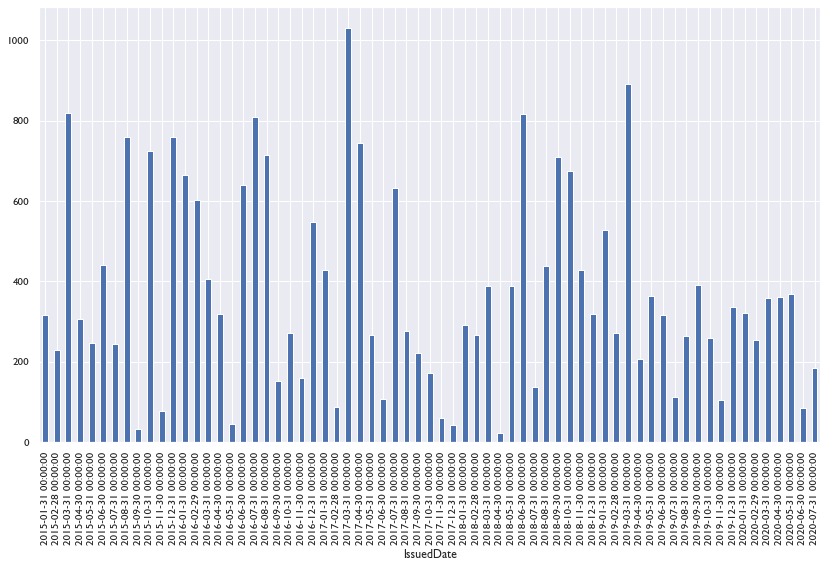

In [74]:
new_apts['2015':'2020'].resample('M')['HousingUnits'].sum().plot(kind='bar',figsize=(14,8))

In [76]:
new_apts['2020-07']

,StatusCurrent,AppliedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
IssuedDate,,,,,,,,,,,,,,,
2020-07-15,Issued Permit,2020-04-01,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New 16 story residential and mixed use building.,BUCCI DEVELOPMENTS LIMITED,174,31580718.0
2020-07-21,Issued Permit,2020-05-06,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,New Building,BROOKFIELD RESIDENTIAL (ALBERTA),6,1439320.0
2020-07-27,Issued Permit,2016-05-24,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,Bridgeland 5-Unit Townhouses (South Building),NaN,5,156140.0


In [77]:
new_apts = apartment[(apartment['WorkClass']=='New')] 
new_apts=new_apts.set_index('AppliedDate')

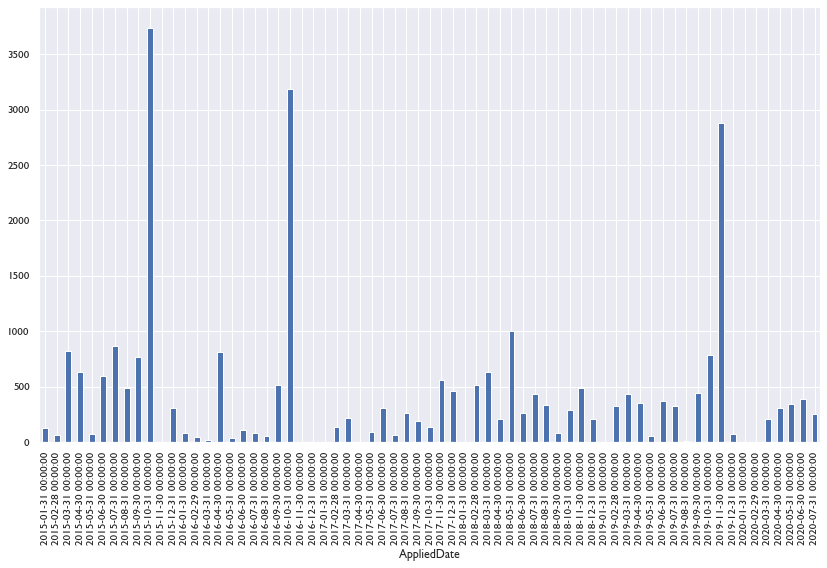

In [78]:
new_apts['2015':'2020'].resample('M')['HousingUnits'].sum().plot(kind='bar',figsize=(14,8))

In [80]:
new_apts.resample('Q').count()

,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
AppliedDate,,,,,,,,,,,,,,,
1999-09-30,14,14,14,14,14,14,14,14,14,14,14,14,6,14,14
1999-12-31,15,14,15,15,15,15,15,15,15,15,15,13,7,15,14
2000-03-31,18,18,18,18,18,18,18,18,18,18,18,16,8,18,18
2000-06-30,21,20,21,21,21,21,21,21,21,21,21,21,9,21,20
2000-09-30,24,24,24,24,24,24,24,24,24,24,24,21,13,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30,13,11,3,13,13,13,13,13,13,13,13,11,6,13,13
2019-12-31,41,24,3,41,41,41,41,41,41,41,41,26,11,41,33
2020-03-31,3,2,0,3,3,3,3,3,3,3,3,2,1,3,3


In [70]:
new_apts['2020']

,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,WorkClassGroup,WorkClassMapped,Description,ContractorName,HousingUnits,EstProjectCost
AppliedDate,,,,,,,,,,,,,,,
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,60,9011395.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,72,10345684.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,59,9010135.0
2020-05-11,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,72,10345684.0
2020-05-06,Issued Permit,2020-05-12,NaN,Commercial / Multi Family Project,Building,1599 - Apt Accessory Building,Apartment,Residential,New,New,New,New Builidng,AVALON MASTER BUILDER,0,14806.0
2020-06-26,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,103,14404780.0
2020-06-26,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,12,2122449.0
2020-03-18,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,TRUMAN HOMES,185,19454524.0
2020-07-10,Pending Plans Review,NaT,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New,New,NaN,NaN,154,56212600.0
